<a href="https://colab.research.google.com/github/pritish-tripathy-aiml/Python-AI-Machine-Learning/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Multiple Linear Regression**

**Formula for Multiple Linear Regression**  
**ŷ = b₀ + b₁X₁ + b₂X₂ + ... + bₙXₙ**  
**ŷ:** It Stands for Dependent Variable  
**b₀:** It is y-intercept(constant)  
**b₁:** Slope Coefficient  
**X₁:** Independent Variable  
...and many **Slope Coefficient** and **Independent Variable**

**Where Linear Regression do not Serve Their Purpose**  
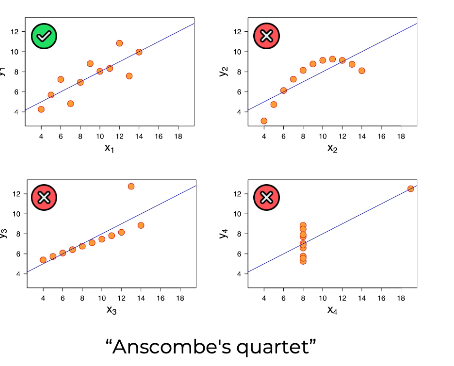

**Assumptions of Linear Regression**
- Where we should not use *Linear Regression*.
1. **Linearity:** Making sure that their is a Linear Relaationship between our Dependent and Independent Variables.  
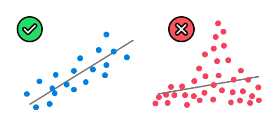  


2. **Homoscedasticity:** This means our variables should be of Equal Variables, you should not see a Increasing or Decreasing Cones.  
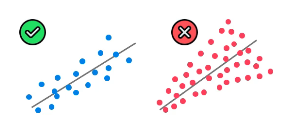


3. **Multivariate Normality:** This means Normality of Error Distribution. Some Error in the Regression.  
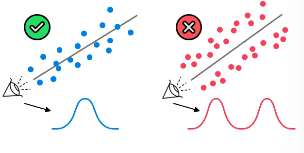  


4. **Independence:** This means observations includes *no correlation* that is any kind of Patterns should not be there.  
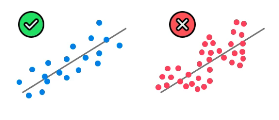  


5. **Lack of Multicollinearity:** Predictors are not correlated with each other.In this the Independent Variables should not be correlated with each other.  


6. **The Outlier Check:** This is not an assumption but an *extra*. That means the outlier is significantly affecting the Linear Regression Line.  
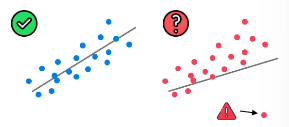


**Dummy Variables**  
ŷ = b₀ + b₁X₁ + b₂X₂ + ... + bₙXₙ  
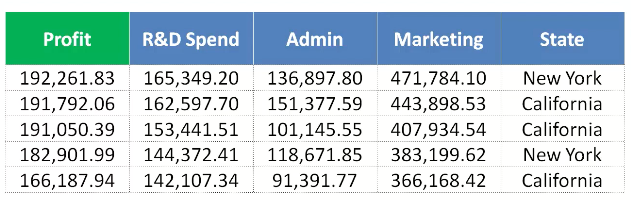


In the above table we will use the equation:  
**ŷ = b₀ + b₁X₁ + b₂X₂ + b₃X₃**  
Here **ŷ** is Profit  
**b₁X₁** is *R&D* with the *Amount*  
**b₂X₂** is *Admin* with the *Amount*  
**b₃X₃** is *Marketing* with the *Amount*  
What we will use in the case of **Categorical Values** like *State* ??  
**Ans.** We will make each state as a Category and put 1 if the State is New York and 0 is the State is not New York same goes for the California Column, like below.  
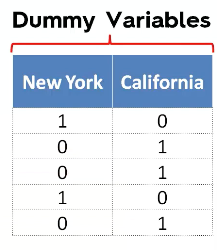

Now our Modified Equation will be:  
**ŷ = b₀ + b₁X₁ + b₂X₂ + b₃X₃ + b₄D₁**

**What is Dummy Variable Trap**  
**Ans.**You should use **D-1** Dummy Variables in the Equation because the Model cannot differentiate between the effects of *D1* and *D2*. That means it will not work properly.

**Statistical Significance**  
**Taking an Example of Coin Toss**  
**H₀:** This is a Fair Coin  
**H₁:** This is not a Fair Coin
*In the Case of **H₀** Coin*  
- Tails: 0.5 %  **(OK)**      
- Tails: 0.25 % **(OK)**
- Tails: 0.12 % **(OK)**
- Tails: 0.06 % **(OK)**
->**α = < 0.05 (P-Value)**
- Tails: 0.03 % **(Bit Suspicious)**
- Tails: 0.01 % **(More Suspicious)**

The **P-Value** will be constantly decreasing in the case of the H₀(Fair Coin) and when the P-Value drops below **α = 0.05** you start to feel suspicious about the Output

**Building a Model using Backward Elimination**  
- **STEP 1:** Select a significance level to stay in the Model**(e.g SL = 0.05)**
- **STEP 2:** Fit the full Model will all Possible Predictors.
- **STEP 3:** Consider the predictor with the highest P-Value. If *P > SL*, go to **STEP 4**, otherwise go to **FIN(Model is Ready)**
- **STEP 4:** Remove the Predictor
- **STEP 5:** Fit Model wihout this Variable.  


**Building a Model using Forward Selection**  
- **STEP 1:** Select a significance level to enter the Model**(e.g SL = 0.05)**
- **STEP 2:** Fit all Simple Regression Models **y ~ xₙ**. Select the one with the lowest P-value
- **STEP 3:** Keep this Variable and fit all Possible Models with one extra predictor added to the one(s) you already have.
- **STEP 4:** Consider the predictor with the *lowest* P-value. If *P < SL*, go to **STEP 3**, otherwise go to **FIN(Keep the Previous Model)**   


**Building a Model using Bidirectional Elimination**  
- **STEP 1:** Select a significance level to stay in the Model**(e.g SLENTER = 0.05, SLSTAY = 0.05)**  
- **STEP 2:** Perform the next step of Forward Selection **(new variables must have: P < SLENTER to enter)**  
- **STEP 3:** Perform all steps of Backward Elimination **(old variables must have: P < SLSTAY to stay)**  
- **STEP 4:** No new variables can enter and no old variables can exit.**FIN(Your Model is Ready)**  


**Building a Model using All Possible Modes**  
- **STEP 1:** Select a criterion of goodness of fit**(e.g. Akaike Criterion)**  
- **STEP 2:** Construct all possible Regression Models: **2ⁿ-1 total Combinations**
- **STEP 3:** Select the one with the Best Criterion. **FIN(Your Model is Ready)**
- **Example:** **10** Columns means **1,023** Models.

###**Importing the Libraries**

In [28]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt

###**Importing the Dataset**

In [37]:
dataset = pd.read_csv('/content/50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [38]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [39]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [40]:
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [41]:
dataset.tail(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


###**Encode the Categorical Data**

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [43]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

###**Splitting Dataset into Training and Test Set**

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

###**Training the Multiple Linear Regression Model on the Training Set**

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

###**Predicting the Test Set Results**

In [46]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


##**Multiple Linear Regression End**